In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import files
uploaded = files.upload()

df=pd.read_csv('creditcard.csv')
print(df.head())

Saving creditcard.csv to creditcard.csv
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206

In [6]:
x=df.isnull().sum()
y=df.duplicated().sum()
print("No of dy=uplicate rows",y)
print("Missing values",x)



No of dy=uplicate rows 1081
Missing values Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [7]:
print("Data Summary")
print(df.describe())

Data Summary
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

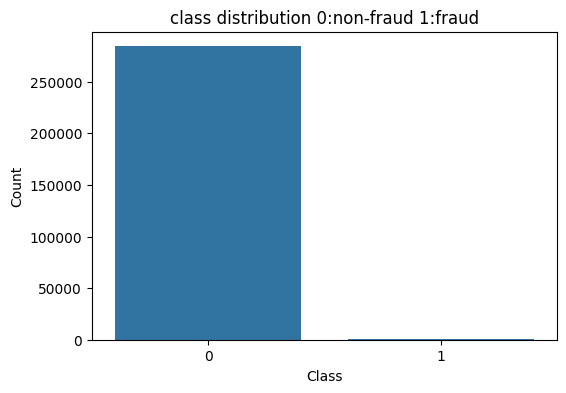

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class',data=df)
plt.title("class distribution 0:non-fraud 1:fraud")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

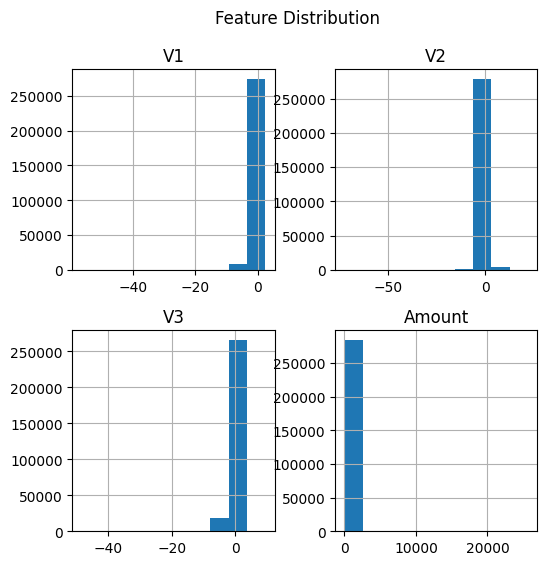

In [9]:
features=["V1","V2","V3","Amount"]
df[features].hist(figsize=(6,6))
plt.suptitle("Feature Distribution")
plt.show()



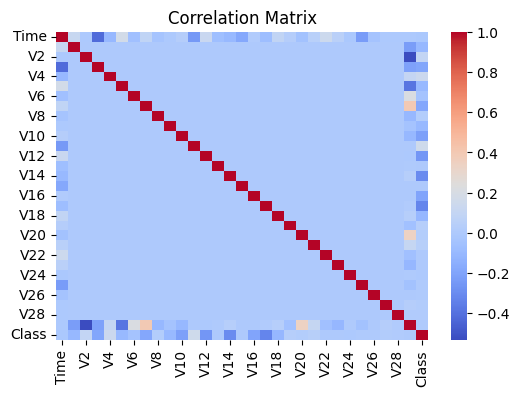

In [10]:
plt.figure(figsize=(6,4))
correlation=df.corr()
sns.heatmap(correlation,cmap='coolwarm',annot=False,fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X=df.drop('Class',axis=1)
Y=df['Class']

scaler=StandardScaler()
scaledX=scaler.fit_transform(X)

scaledX=pd.DataFrame(scaledX,columns=X.columns)

trainX,testX,trainY,testY=train_test_split(scaledX,Y,test_size=0.2,random_state=42,stratify=Y)

print("Testing Set Shape",trainX.shape)
print("Testing Set Shape",trainY.shape)
print("Testing Set Shape",testX.shape)
print("Testing Set Shape",testY.shape)

Testing Set Shape (227845, 30)
Testing Set Shape (227845,)
Testing Set Shape (56962, 30)
Testing Set Shape (56962,)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,roc_auc_score

logreg=LogisticRegression(max_iter=1000,random_state=42)
logreg.fit(trainX,trainY)
logreg_pred=logreg.predict(testX)
logreg_prob=logreg.predict_proba(testX)[:,1]

print(" Logistic Regression Classification report")
print(classification_report(testY,logreg_pred))
print("AUC-ROC Score",roc_auc_score(testY,logreg_prob))

rf=RandomForestClassifier(n_estimators=50,random_state=42)
rf.fit(trainX,trainY)
rf_pred=rf.predict(testX)
rf_prob=rf.predict_proba(testX)[:,1]

print("Random Forest Classification report")
print(classification_report(testY,rf_pred))
print("AUC-ROC Score",roc_auc_score(testY,rf_prob))

 Logistic Regression Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962

AUC-ROC Score 0.9599474004570878
Random Forest Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

AUC-ROC Score 0.9533159317469251


In [17]:
from sklearn.ensemble import IsolationForest

iforest=IsolationForest(n_estimators=50,contamination=0.01,random_state=42)
iforest.fit(trainX)
iforest_pred=iforest.predict(testX)
iforest_predy=np.where(iforest_pred==1,1,0)

print("Isolation Forest prediction distribution")
print(pd.Series(iforest_predy).value_counts())

print("Isolation Forest Classification report")
print(classification_report(testY,iforest_predy))
print("AUC-ROC Score",roc_auc_score(testY,iforest_predy))


Isolation Forest prediction distribution
1    56341
0      621
Name: count, dtype: int64
Isolation Forest Classification report
              precision    recall  f1-score   support

           0       0.90      0.01      0.02     56864
           1       0.00      0.35      0.00        98

    accuracy                           0.01     56962
   macro avg       0.45      0.18      0.01     56962
weighted avg       0.90      0.01      0.02     56962

AUC-ROC Score 0.17836703828971093


In [18]:
from sklearn.svm import OneClassSVM

ocsvm=OneClassSVM(kernel='rbf',gamma='scale',nu=0.01)
ocsvm.fit(trainX)
ocsvm_pred=ocsvm.predict(testX)

ocsvm_predy=np.where(ocsvm_pred==1,0,1)

print("One Class SVM prediction distribution")
print(pd.Series(ocsvm_predy).value_counts())

print("One Class SVM Classification report")
print(classification_report(testY,ocsvm_predy))
print("AUC-ROC Score",roc_auc_score(testY,ocsvm_predy))

One Class SVM prediction distribution
0    56232
1      730
Name: count, dtype: int64
One Class SVM Classification report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.08      0.57      0.14        98

    accuracy                           0.99     56962
   macro avg       0.54      0.78      0.56     56962
weighted avg       1.00      0.99      0.99     56962

AUC-ROC Score 0.779787864780127


In [34]:
def create_sequences(data, ts):
    sequences = []
    for i in range(len(data) - ts):
        seq = data[i:i + ts]
        sequences.append(seq)
    return np.array(sequences)
ts=10
xtrain_seq = create_sequences(trainX.values, ts)
xtest_seq = create_sequences(testX.values, ts)

print("Training Set Shape:", xtrain_seq.shape)
print("Testing Set Shape:", xtest_seq.shape)


Training Set Shape: (227835, 10, 30)
Testing Set Shape: (56952, 10, 30)


In [38]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,LSTM,RepeatVector,TimeDistributed,Dense

latent_dim=32
features=trainX.shape[1]

input_layer=Input(shape=(ts,features))
encoder=LSTM(latent_dim,activation='relu',return_sequences=False)(input_layer)
decoder=RepeatVector(ts)(encoder)
decoder=LSTM(features,activation='relu',return_sequences=True)(decoder)
decoder=TimeDistributed(Dense(features))(decoder)

autoencoder=Model(inputs=input_layer,outputs=decoder)
autoencoder.compile(optimizer='adam',loss='mse')
autoencoder.summary()

history=autoencoder.fit(xtrain_seq,xtrain_seq, epochs=20,
                          batch_size=64,
                          validation_split=0.1,
                          shuffle=True)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 10, 30)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 32)                  │           8,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_2 (RepeatVector)       │ (None, 10, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 10, 30)              │           7,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ (None, 10, 30)              │             930 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,554 (64.66 KB)

 Trainable params: 16,554 (64.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
3204/3204 ━━━━━━━━━━━━━━━━━━━━ 55s 13ms/step - loss: 0.9482 - val_loss: 0.8879
Epoch 2/20
3204/3204 ━━━━━━━━━━━━━━━━━━━━ 83s 13ms/step - loss: 0.8912 - val_loss: 0.8700
Epoch 3/20
3204/3204 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - loss: 0.8651 - val_loss: 0.8189
Epoch 4/20
3204/3204 ━━━━━━━━━━━━━━━━━━━━ 83s 13ms/step - loss: 0.8284 - val_loss: 0.8078
Epoch 5/20
3204/3204 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - loss: 0.8025 - val_loss: 0.7804
Epoch 6/20
3204/3204 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - loss: 0.7745 - val_loss: 0.7534
Epoch 7/20
3204/3204 ━━━━━━━━━━━━━━━━━━━━ 83s 13ms/step - loss: 0.7466 - val_loss: 0.7467
Epoch 8/20
3204/3204 ━━━━━━━━━━━━━━━━━━━━ 83s 14ms/step - loss: 0.7423 - val_loss: 0.7394
Epoch 9/20
3204/3204 ━━━━━━━━━━━━━━━━━━━━ 81s 13ms/step - loss: 0.7225 - val_loss: 0.8163
Epoch 10/20
3204/3204 ━━━━━━━━━━━━━━━━━━━━ 82s 13ms/step - loss: 0.7171 - val_loss: 0.7404
Epoch 11/20
3204/3204 ━━━━━━━━━━━━━━━━━━━━ 81s 13ms/step - loss: 0.7240 - val_loss: 0.7147
Epoch 12

In [43]:
xtest_pred = autoencoder.predict(xtest_seq)
print("X_test_pred shape:", xtest_pred.shape)

# Calculate reconstruction error for each sequence
reconstruction_error = np.mean(np.square(xtest_seq - xtest_pred), axis=(1, 2))
print("Reconstruction error (first 10 sequences):", reconstruction_error[:10])

# Determine threshold using the 95th percentile of training reconstruction errors
xtrain_pred = autoencoder.predict(xtrain_seq)
train_reconstruction_error = np.mean(np.square(xtrain_seq - xtrain_pred), axis=(1, 2))
print("Train reconstruction error (first 10 sequences):", train_reconstruction_error[:10])
threshold = np.percentile(train_reconstruction_error, 95)
print("Reconstruction error threshold:", threshold)

# Flag anomalies: sequences with reconstruction error greater than the threshold
anomaly_flags = reconstruction_error > threshold
print("Anomaly flags (first 10):", anomaly_flags[:10])
print("Number of anomalies detected in test set:", np.sum(anomaly_flags))



1780/1780 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step
X_test_pred shape: (56952, 10, 30)
Reconstruction error (first 10 sequences): [0.73109693 1.40436261 0.91887917 0.63675995 0.64460028 0.48363881
 0.48838358 0.45526908 0.49925435 0.56853324]
7120/7120 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step
Train reconstruction error (first 10 sequences): [0.87182806 0.83376836 0.84823581 0.64052145 0.67265527 0.63049775
 0.75384059 0.82105058 0.86804595 0.70250238]
Reconstruction error threshold: 1.0002802254744714
Anomaly flags (first 10): [False  True False False False False False False False False]
Number of anomalies detected in test set: 3029
